# Exploring Uber and Lyft Prices in Boston
Author: Erik Roosendahl

## Overview

*  Python for DS
*  The DS and ML Workflows
*  Exploratory Data Analsyis
*  Learning Principles and Ethical Thinking for DS

### Collaborators and Sources


In [9]:
# collaborators and sources:
# Albert Einstein and Marie Curie
# https://developers.google.com/edu/python/strings
# Adapted from Introductory Data Science assignment from WUSTL.

# your code here
answer = '\
\
https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/                                    \
    : help with grouped bar charts  \
https://stackoverflow.com/questions/4971269/how-to-pick-a-new-color-for-each-plotted-line-within-a-figure-in-matplotlib   \
    : gave me the line in make_bar_plots_monka that creates the color iterable (i had tried it in a more complicated less effective way, this was much better) \
    : unluckily this was 10 years old so the line had some issues which needed fixing                                     \
https://www.w3schools.com/python/python_dictionaries.asp                                                                  \
    : help with dictionaries                                                                                              \
https://stackoverflow.com/questions/12761806/matplotlib-2-different-legends-on-same-graph                                 \
    : multiple legends                                                                                                    \
    '

## Introduction

We used public data on Uber and Lyft drivers in Boston: (https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma). 

My goal was to use this dataset to gain some insight about characteristics of rides and _perhaps_ find some patterns in this data.

Generally I followed this process:

1. Gather and initially inspect data for initial basic understanding
2. Wrangle the data
3. Profile the data
4. Develop questions an da hypothesis
5. Use the data to investigate hypothesis
6. Summarize results and answer questions 
7. Critically review my workflow and discuss ethical concerns

## Initial Data Exploration

This is a set of almost 700,000 data points, each with 57 features.
This data set is accumulated data from Uber and Lyft (and taxis it seems) on rides from the Boston, MA area.  
Every data point has values for features related to that drive.
The features primarily focus on the characteristics of the ride, the driver/company/cab, and the weather during the ride at the location of the ride.
There are many different types of values in the data set, ranging from strings, to ints, to floats, booleans, and categorical variables.
Some variables with real values, such as datetime, are stored as strings, and may require some formatting and transforming to turn into usable values.
It also seems there was roughly even distribution of destinations for rides originating from the same source.
All data points are taken within a 17 day window, starting on November 26, 2018, which is the earliest date in the data set.
This data is a sample data set, as there are more drivers and riders, in the world and in Boston, MA, than what we have here.

### Data Wrangling

This data took some work to get into the formats that I wanted for my visualizations.  
The vast majority of the specific data wrangling takes place within the functions.  
I wanted to compare data sets corresponding to the same source, so this let me split the overall data up by source, and then pass those smaller data frames into the functions to do much of the wrangling.  

All functions are generally documented above their definitions in the "Roosendahl_2018ULEDA_Functions" file.

In [16]:
# general imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pprint

original_data = pd.read_csv("./utility/data/rideshare_kaggle.csv")

In [18]:
# function & variable imports

# variables
from utility.Roosendahl_2018ULEDA_Functions import big_bang
from utility.Roosendahl_2018ULEDA_Functions import minimum_visibility
from utility.Roosendahl_2018ULEDA_Functions import maximum_visibility
from utility.Roosendahl_2018ULEDA_Functions import destination_color_dict
from utility.Roosendahl_2018ULEDA_Functions import destination_marker_dict
from utility.Roosendahl_2018ULEDA_Functions import short_weather_summary_color_dict
from utility.Roosendahl_2018ULEDA_Functions import visibility_categorical_color_dict

# my functions
from utility.Roosendahl_2018ULEDA_Functions import datetime_to_seconds
from utility.Roosendahl_2018ULEDA_Functions import time_of_day_to_categorical
from utility.Roosendahl_2018ULEDA_Functions import time_of_day_to_categorical_MORE_CATEGORIES
from utility.Roosendahl_2018ULEDA_Functions import visibility_to_categorical
from utility.Roosendahl_2018ULEDA_Functions import generate_source_specific_destination_distributions
from utility.Roosendahl_2018ULEDA_Functions import generate_source_specific_destination_distributions_dict
from utility.Roosendahl_2018ULEDA_Functions import vizualize_destination_distributions
from utility.Roosendahl_2018ULEDA_Functions import date_vs_price_vs_weather
from utility.Roosendahl_2018ULEDA_Functions import date_vs_price_vs_visibility
from utility.Roosendahl_2018ULEDA_Functions import date_vs_price_vs_visibility_vs_destination
from utility.Roosendahl_2018ULEDA_Functions import vizualize_dpvd_outliers
from utility.Roosendahl_2018ULEDA_Functions import count_outlier_destinations
from utility.Roosendahl_2018ULEDA_Functions import generate_source_specific_patches
from utility.Roosendahl_2018ULEDA_Functions import profile

# instructor provided
from utility.Roosendahl_2018ULEDA_Functions import configure_plots

In [19]:
# I also like pretty plots
configure_plots()

In [20]:
# just resets data to original
data = original_data[['id', 'timestamp', 'day', 'month', 'datetime', 'source', \
                      'destination','name', 'price', 'short_summary', 'long_summary', \
                      'visibility']].copy()

In [21]:
# Some Data Wrangling

# Generally just adding useful features (derived from difficult to use data).

# Gather slices of data specific to 'source' feature into their own 'source_specific_data_frame'.
hs_data = data[data.source == 'Haymarket Square'].copy()
bb_data = data[data.source == 'Back Bay'].copy()
ne_data = data[data.source == 'North End'].copy()
ns_data = data[data.source == 'North Station'].copy()
bh_data = data[data.source == 'Beacon Hill'].copy()
bu_data = data[data.source == 'Boston University'].copy()
fw_data = data[data.source == 'Fenway'].copy()
ss_data = data[data.source == 'South Station'].copy()
td_data = data[data.source == 'Theatre District'].copy()
we_data = data[data.source == 'West End'].copy()
fd_data = data[data.source == 'Financial District'].copy()
nu_data = data[data.source == 'Northeastern University'].copy()

# Generate and add the time_of_day feature
# Measures the time of day in seconds
hs_data["time_of_day"] = datetime_to_seconds(hs_data.datetime)
bb_data["time_of_day"] = datetime_to_seconds(bb_data.datetime)
ne_data["time_of_day"] = datetime_to_seconds(ne_data.datetime)
ns_data["time_of_day"] = datetime_to_seconds(ns_data.datetime)
bh_data["time_of_day"] = datetime_to_seconds(bh_data.datetime)
bu_data["time_of_day"] = datetime_to_seconds(bu_data.datetime)
fw_data["time_of_day"] = datetime_to_seconds(fw_data.datetime)
ss_data["time_of_day"] = datetime_to_seconds(ss_data.datetime)
td_data["time_of_day"] = datetime_to_seconds(td_data.datetime)
we_data["time_of_day"] = datetime_to_seconds(we_data.datetime)
fd_data["time_of_day"] = datetime_to_seconds(fd_data.datetime)
nu_data["time_of_day"] = datetime_to_seconds(nu_data.datetime)

# add new feature column to each df for time of the day as a category 
# ("Pre-morning", "Early Morning", "Late Morning","Afternoon", "Evening", "Nighttime")  
hs_data["time_of_day_categorical"] = time_of_day_to_categorical_MORE_CATEGORIES(hs_data.time_of_day)
bb_data["time_of_day_categorical"] = time_of_day_to_categorical_MORE_CATEGORIES(bb_data.time_of_day)
ne_data["time_of_day_categorical"] = time_of_day_to_categorical_MORE_CATEGORIES(ne_data.time_of_day)
ns_data["time_of_day_categorical"] = time_of_day_to_categorical_MORE_CATEGORIES(ns_data.time_of_day)
bh_data["time_of_day_categorical"] = time_of_day_to_categorical_MORE_CATEGORIES(bh_data.time_of_day)
bu_data["time_of_day_categorical"] = time_of_day_to_categorical_MORE_CATEGORIES(bu_data.time_of_day)
fw_data["time_of_day_categorical"] = time_of_day_to_categorical_MORE_CATEGORIES(fw_data.time_of_day)
ss_data["time_of_day_categorical"] = time_of_day_to_categorical_MORE_CATEGORIES(ss_data.time_of_day)
td_data["time_of_day_categorical"] = time_of_day_to_categorical_MORE_CATEGORIES(td_data.time_of_day)
we_data["time_of_day_categorical"] = time_of_day_to_categorical_MORE_CATEGORIES(we_data.time_of_day)
fd_data["time_of_day_categorical"] = time_of_day_to_categorical_MORE_CATEGORIES(fd_data.time_of_day)
nu_data["time_of_day_categorical"] = time_of_day_to_categorical_MORE_CATEGORIES(nu_data.time_of_day)

# Generate and add the adjusted_timestap feature
# This features functions as our "Date"
hs_data['adjusted_timestamp'] = hs_data.timestamp - big_bang
bb_data['adjusted_timestamp'] = bb_data.timestamp - big_bang   
ne_data['adjusted_timestamp'] = ne_data.timestamp - big_bang
ns_data['adjusted_timestamp'] = ns_data.timestamp - big_bang
bh_data['adjusted_timestamp'] = bh_data.timestamp - big_bang
bu_data['adjusted_timestamp'] = bu_data.timestamp - big_bang
fw_data['adjusted_timestamp'] = fw_data.timestamp - big_bang
ss_data['adjusted_timestamp'] = ss_data.timestamp - big_bang
td_data['adjusted_timestamp'] = td_data.timestamp - big_bang
we_data['adjusted_timestamp'] = we_data.timestamp - big_bang
fd_data['adjusted_timestamp'] = fd_data.timestamp - big_bang
nu_data['adjusted_timestamp'] = nu_data.timestamp - big_bang

# Generate and add the visibility_categorical feature
hs_data["visibility_categorical"] = visibility_to_categorical(hs_data.visibility)
bb_data["visibility_categorical"] = visibility_to_categorical(bb_data.visibility)
ne_data["visibility_categorical"] = visibility_to_categorical(ne_data.visibility)
ns_data["visibility_categorical"] = visibility_to_categorical(ns_data.visibility)
bh_data["visibility_categorical"] = visibility_to_categorical(bh_data.visibility)
bu_data["visibility_categorical"] = visibility_to_categorical(bu_data.visibility)
fw_data["visibility_categorical"] = visibility_to_categorical(fw_data.visibility)
ss_data["visibility_categorical"] = visibility_to_categorical(ss_data.visibility)
td_data["visibility_categorical"] = visibility_to_categorical(td_data.visibility)
we_data["visibility_categorical"] = visibility_to_categorical(we_data.visibility)
fd_data["visibility_categorical"] = visibility_to_categorical(fd_data.visibility)
nu_data["visibility_categorical"] = visibility_to_categorical(nu_data.visibility)


The rest of the data wrangling happens within the functions so that it's easy for me to make observations or visualizations for data originating from one source, and compare it with that of any other 'source_specific_data_frame' I want to. 

The functions themselves are documented generally, so if you want to know more about what they are doing there are comments with their definitions.

### Data Profiling

Generating basic summary statistics and plots of the data, and seeking to determine interesting aspects that could be further explored or tested.

Let's start small.
First, let's see the overall distribution of sources for the pruned (but not source specific) data set.

![Simple Distributions](utility/pics/Ride_sources_distribution_allData.png)


Nothing crazy here, but it certainly suggests that a criteria for gathering this data was taking data to fit this clearly specified ratio.

What I will take from this is that I'm am more interested in variations in other variables with more diverse ranges and less intentional distributions, and in fact, source may be a good variable to think about as constant.  

I started thinking about how I could explore this data to learn more about ride characteristics specific to each ride starting location.  Good news, we already have data frames for each unique source (defined above in data wrangling section).

What could we do with those?

Why don't we check the relationships between sources and destinations!

Let's focus on the Haymarket Square data for now.  

Let's look at another simple data representation:

![hs_destination_distributions_simple](utility/pics/hs_destination_distributions_simple1.PNG)


Again, this doesn't exactly scream a pattern to me.  It looks like rides are fairly evenly spaced across destinations, and the differences all seem fairly believable.

So how can I make this tell me more?

Let's get another variable into the mix.  

I want to look at the same data above, but see if it is affected by what time of day it is.

Let's try a grouped bar plot! (Using function vizualize_destination_distributions(source_specific_dataframe) from function doc)


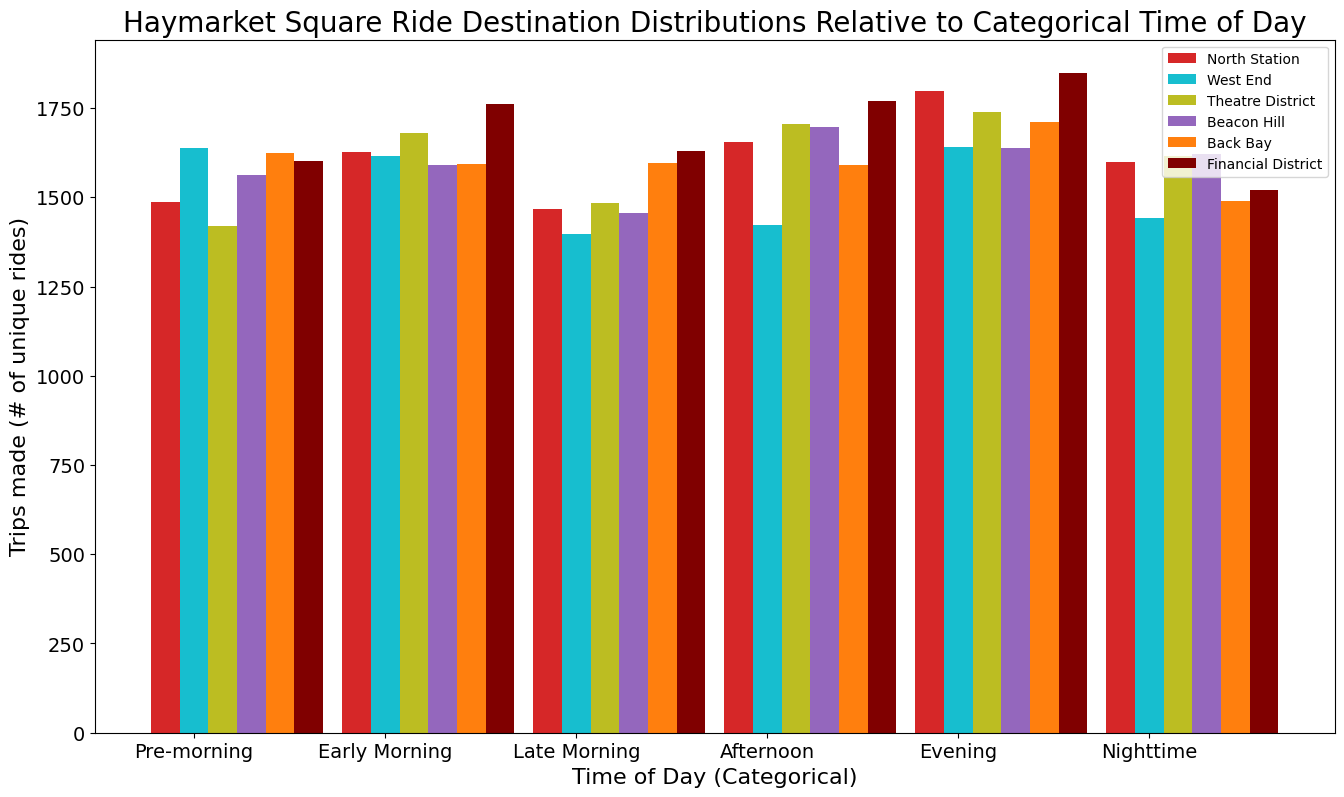

In [22]:
# Use this cell to look at this vizualization for any source_specific_dataframe, using the function vizualize_destination_distributions(source_specific_dataframe).
# Feel free to change "hs_data" to any other source_specific_data_frame we created during the data wrangling process.
# Options:  hs_data, bb_data, ne_data, ns_data, bh_data, bu_data, fw_data, ss_data, td_data, we_data, fd_data, nu_data
# It is helpful to know that the colors of the destinations are consistent, so for example: North Station will always show as red, regardless of which source dataframe we are using.

vizualize_destination_distributions(hs_data)

Using this function, it's easy to look at this visualization for every source-specific data frame.

Rather than put 12 of these plots next to each other in this notebook (even though the colors would look great) let's just look at data from North End for now.
<a id='Destination_distributions'></a>
![NorthEnd_Dest_Dists](utility/pics/ne_destination_distributions.PNG)

Here, I noticed the significant different in ride demand in ride in the evening going to Beacon Hill, and rides at night going to West End.  Even considering the different in total rides going out at night vs evening, people in North End clearly want to go to Beacon Hill a lot more than they want to go to West End.  

If I'm an uber driving picking when and where to work, this information tells me what time and place I am more likely to have work.

## Forming and Asking Harder Questions

### What to investigate?

Use our new understanding and our data profiling to find interesting details or aspects of the data to explore and potentially exploit.

Let's pick a new variable to look at.  We just found relationships between destinations riders want to go to, and the time of day they want to go, and found that this relationship can inform drivers as to the most lucrative spots they want to work at, and when.  (It could also inform their deciding where to go to pick someone up at night - let's say I'm an uber driver, this is my last right, and I want to end up in Beacon Hill when I'm done.  I can look at this data, and see relatively high rider desire to go to Beacon Hill at night, and adjust appropriately.  This example isn't a huge productivity increase by any means, but across the millions of drivers employed, small productivity increases add up!)

So my question is: are there more features like this, with useful/influential affects on rider decision making?  If there are that would be profitable!  

Well we have all this weather data, maybe the weather influences drivers' decision making in some measurable and observable way.  Let's pick 1 weather feature, short_summary, and do some data exploration!

<a id='short_sum_vis'></a>

![hs_datevpricevweather](utility/pics/test.PNG)

Hmmm, this didn't really do all that much for me.  I'm sure there's plenty to learn here, but I'm really not a huge fan of this short_summary variable (too many variations for cloudy!).  For the rest we'll swap over to visibility, and observe it against date, drive source, and destination.

I hypothesize that day visibility will have an observable and influential effect on the decision making of riders, and this could be used by the drivers to better inform where they look for work.

### Explore Hypothesis

Let's see what profile() does:
Note:  I had some issues with legends in profile.  Long story short, I'll provide the markers (in string format) corresponding to destinations here.  For more information on this issue see the comments around date_vs_price_vs_visibility_vs_destination and profile() in the functions doc (Roosendahl_2018ULEDA_Functions.py).

![dest_market_dict](utility/pics/dest_market_dict.PNG)

profile(hs_data, threshhold = 35):

<a id='profile_main'><a/>
![profile_main](utility/pics/hs_profile_main.PNG)
<a id='profile_outliers'><a/>
![profile_outliers](utility/pics/hs_profile_outliers.PNG)

![outlier_dest_dists](utility/pics/outlier_destination_distributions.PNG)


Dictionary place-holder for a proper legend (full reasons explained in Roosendahl_2018ULEDA_Functions):
The symbols correspond to the 'marker' characteristic of a data point on a visualization.
Therefore this dict is showing the Destinations corresponding to the markers on the plot.
{'Back Bay': 'v',
 'Beacon Hill': '>',
 'Boston University': 's',
 'Fenway': 'p',
 'Financial District': 'D',
 'Haymarket Square': 'o',
 'North End': '^',
 'North Station': '<',
 'Northeastern University': '+',
 'South Station': 'P',
 'Theatre District': '*',
 'West End': 'X'}


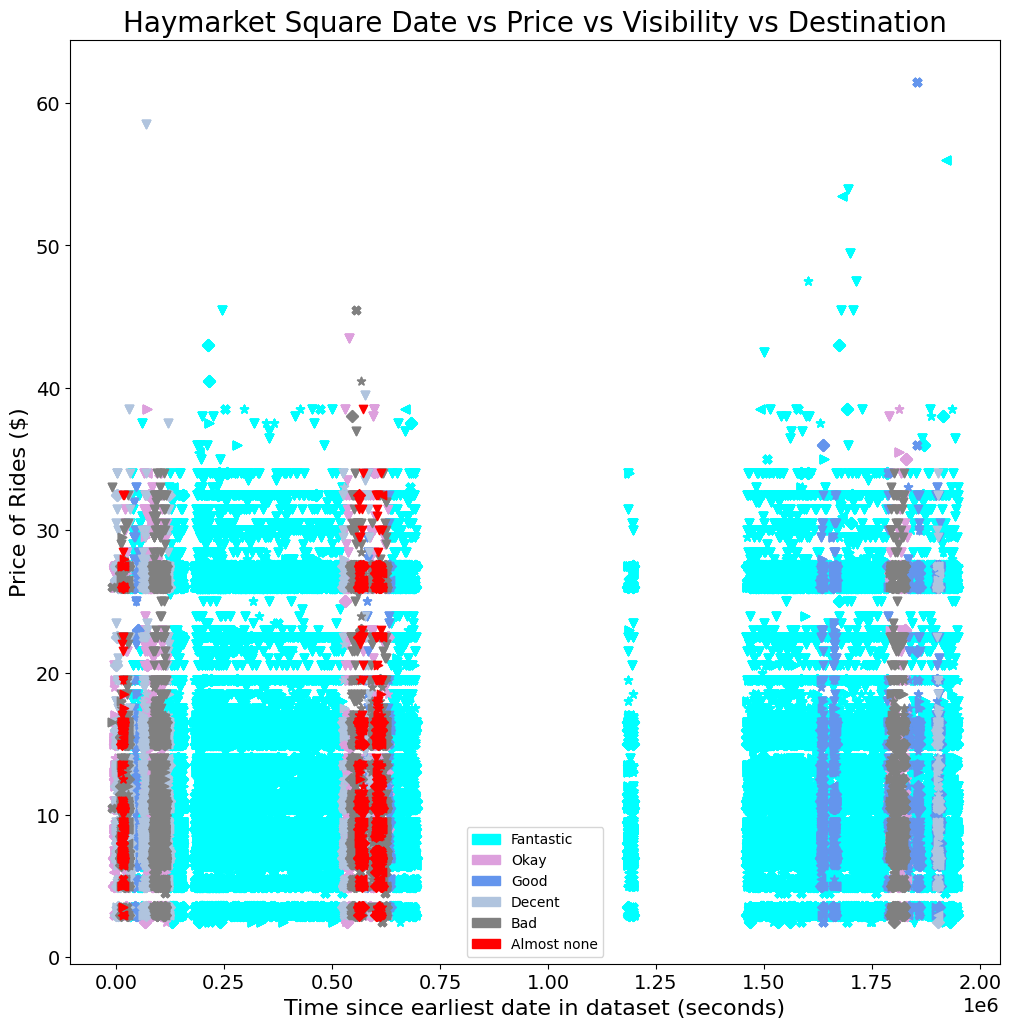

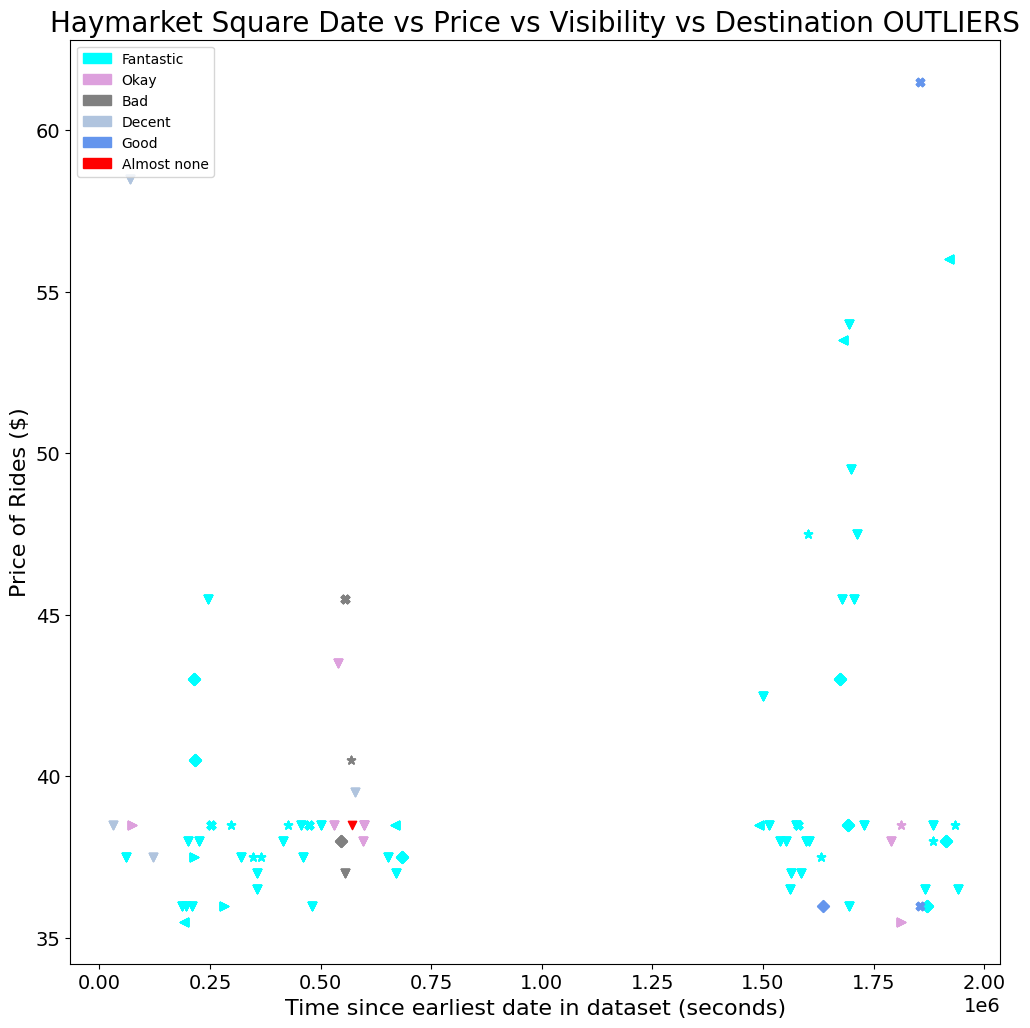

Haymarket Square : Trips per destination =  {'Back Bay': 49, 'Financial District': 9, 'Theatre District': 10, 'West End': 6, 'North Station': 5, 'Beacon Hill': 4}


In [23]:
# Using profile() 

# Remember you can change the threshhold variable to get different outliers set, and pass any source_specific dataframe for info on rides from that location.

profile(hs_data, threshhold = 35)

# Comment for profile function taken from Roosendahl_Hw6_Functions.py documentation:
# This is the main function for displaying my data analysis, and the final step for my exploration.
# It takes data all originating from the same source and draws 2 visualizations for Date vs Price vs Visibility vs Destination (through the calls to the matching functions found and described above.
# The first visualization displays all the source_specific data, the second shows only the outliers outside of the threshhold argument.


### Result Analysis

I'd consider it a success as this theoretical insight could certainly be used to increase revenue.    

If my initial goal was to generally explore this data set to find features we can use to predict driver behavior, we have found at least 2 now.  First we found that time of day can be useful for an uber driver predicting where to go for work (both for ride demand and preference in destination).  

Now, what most caught my eye with the visibility focussed visualizations was actually the outliers.  Those data points outside of the normal price ranges are trips where the rider was willing to pay more to get where they were going, and the vast majority of these outliters are travelling to Back Back!  (Note above we have trip counts per destination for Haymarket Square below the outlier graph above.  This prints with profile()).

Well, now we know that on days with high visibility, head over to haymarket square, and you have a relatively high likelihood of finding a rider willing to pay extra to get to Back Bay!  

So let's think back a bit:

From [this image](#Destination_distributions) we learned more about the various ride demands in different locations at different times of day.

Which lead me to ask if we can find similarly useful information in weather data!

We may have had to [reconsider](#short_sum_vis) our first weather variable, but we definitely found some useful visualizations and information from our [visibility plots](#profile_main).  

Ultimately, we learned and observed 2 different visualizations that give insight into rider demand and thereby improve driver productivity, and parent company profit!


Exploring more:
It's also interesting that so many rides here are from the same location to the same destination, and have wildly different prices.  So much so that some rides matching Back Bay have almost double the cost of others to the same location, and we're all starting at Haymarket Square, so what is going on?
Why are people so especially willing to go the extra mile to go to Back Bay on days with high visibility?  I bet it's a beach!!! 

### Retrospective Analysis
Look back and ask questions like:
* Who does this data affect? ('stakeholders')
* How could this work and its affect cause ethical problems for people other than myself?
* Are there solutions to these issues?

There is the issue of privacy.  We have taken detailed information on the movements of our customers.  It would certainly be a much bigger issue if there were any identifying information in the data set to tie it to the riders themselves, but it still is functionally taking personal information.  You can look at it as uber just tracking their own vehicles, but the data specifically entails the travels of a driver (unless we had data for driver-less trips, which is unlikely I think).  Any time we are gathering person information of common people it is very dangerous what we do with the data.

Certainly uber is a stakeholder in this data, but so are the riders and drivers themselves.  

Uber has done a good job of making sure this data is as disconnected from their drivers, but of course you never know what other data uber might have lying around, and combining the two turns into tracking the movements of every day people, which is of course a big of a privacy concern.

Another ethical concern could be competitive - most companies don't have the resources or capability to gather data on this scale, and they lose out on its insights.  This gives larger companies the advantage of simply being able to gather more data.  While this is arguably justifiable for economic and perhaps philosophical reasons, this data still becomes an advatage only one entity has access too.  

It is difficult to totally remove the connection to the riders, because the biggest offenders are the source and destinations, which are quite important features.  The best way to resolve the distribution of the data would be to make it public, which in this case it certainly seems to be.  

### Data Retrospective
How could our data have been better?

There were certainly many weather variables that were better left not used, at least for me.  Features like precipProbability were largely filled with 0s, despite being continuous, which could result in lackluster visualizations as so many are missing.  

I think it would be potentially quite interesting to observe this data and compare whether the trip was being made for business or pleasure.  I am curious the flow of these communities throughout the day, and that would be a good way to see at least some of that.  However, this would increase exactly the ethical problem I had raised before, of introducing personal data of common people.  If the sources of the data (the people) agreed to share that information it could be interesting, but if not it would certainly be an invasion of privacy to make use of that data against the peoples' wishes.